In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("./data/Fish.csv")

In [4]:
df = df.loc[df["Species"] == "Perch", ["Species", "Length2", "Weight"]]

In [5]:
df.head()

,Species,Length2,Weight
72,Perch,8.4,5.9
73,Perch,13.7,32.0
74,Perch,15.0,40.0
75,Perch,16.2,51.5
76,Perch,17.4,70.0


In [6]:
x_train, x_test, y_train, y_test = train_test_split(df["Length2"], df["Weight"], test_size=0.25, random_state=22)

In [7]:
x_train = np.reshape(x_train.values, (-1, 1))
x_test = np.reshape(x_test.values, (-1, 1))

In [8]:
x_train.shape

(42, 1)

# 선형회귀(Linear regression)

- 피처를 가장 잘 표현하는 하나의 직선을 학습하는 알고리즘

- 장점
    - 계수들에 대한 해석이 간단
    - 학습과 예측 속도가 빠름
    - 회귀식이 만들어져서 예측이 어떻게 됐는지 쉽게 이해할 수 있음

- 단점
    - 데이터가 선형적이지 않을 경우 모델이 데이터에 적합하지 않을 수 있음
    - 이상치에 민감

In [9]:
lr = LinearRegression()

In [11]:
# 선형회귀 모델 훈련
lr.fit(x_train, y_train)

LinearRegression()

In [12]:
# 50cm 농어에 대한 예측
lr.predict([[50]])

array([1220.62501766])

- 선형회귀 모델이 찾은 가장 적합한 직선은 lr 객체에 저장되어 있음

In [13]:
# 계수(coefficient), y절편
print(lr.coef_, lr.intercept_)

[37.8371228] -671.2311222012914


- 회귀식 : 37.84 * Length2 + (-671.23)

- coef_와 intercept_ 처럼 머신러닝이 찾은 값을 모델 파라미터(model parameter)라고 부름

- 즉, 머신러닝 알고리즘의 훈련과정은 최적의 모델 파라미터를 찾는 것

- 선형회귀와 같이 모델 파라미터를 훈련하는 것을 **모델 기반 학습** 이라고 하고 KNN과 같이 모델 파라미터가 없이 훈련하는 데이터를 저장하는 훈련 방법을 **사례 기반 학습** 이라고 함

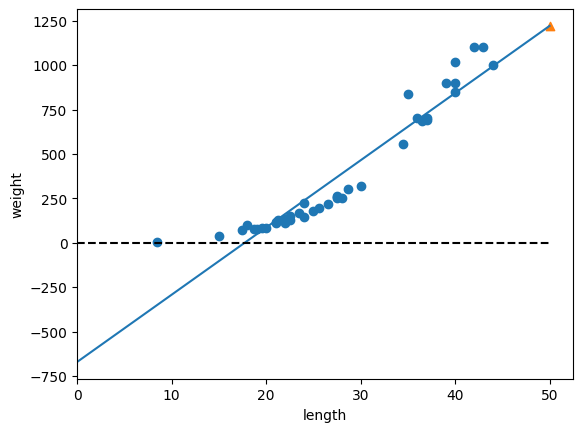

In [15]:
# 훈련 데이터와 회귀선 시각화
plt.figure()

plt.scatter(x_train, y_train)
plt.plot([0, 50], [lr.intercept_, 50 * lr.coef_[0] + lr.intercept_])
plt.scatter(50, 1220, marker="^")
plt.plot([0, 50], [0, 0], "k--")

plt.xlim(0)
plt.xlabel("length")
plt.ylabel("weight")

plt.show()

# 모델 평가

In [16]:
lr.score(x_test, y_test)

0.9475583788338927

In [17]:
pred = lr.predict(x_test)

In [18]:
mae = mean_absolute_error(y_test, pred)

In [19]:
mae

62.14853638856366

# 다항회귀

- 실제 농어의 무게는 일직선이라기보다는 왼쪽 위로 구부러진 곡선에 가깝기 떄문에 곡선으로 예측하는 것이 더 적합

- 길이를 제곱한 항을 추가하여 2차 방정식의 그래프 형태로 학습

In [22]:
df["squared"] = df["Length2"] **2

In [23]:
df.head()

,Species,Length2,Weight,squard,squared
72,Perch,8.4,5.9,70.56,70.56
73,Perch,13.7,32.0,187.69,187.69
74,Perch,15.0,40.0,225.00,225.00
75,Perch,16.2,51.5,262.44,262.44
76,Perch,17.4,70.0,302.76,302.76


In [25]:
# 데이터 분할
x_test, x_train, y_test, y_train = train_test_split(df[["Length2", "squared"]], df["Weight"], test_size=0.25, random_state=22)

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
# 모델 평가
lr.score(x_test, y_test)

0.9541602968941244

In [30]:
# 평균 절대오차
pred = lr.predict(x_test)

In [31]:
mae = mean_absolute_error(y_test, pred)

In [32]:
mae

45.144052185017074

In [33]:
# 50cm 농어에 대한 예측
lr.predict([[50, 2500]])

c:\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1432.16996694])

In [34]:
# 회귀식
print(lr.coef_, lr.intercept_)

[-17.74749458   0.88699012] 102.06938777154153


- 회귀식 : -26.36 * Length2 + 1.12 * squared + 166.97

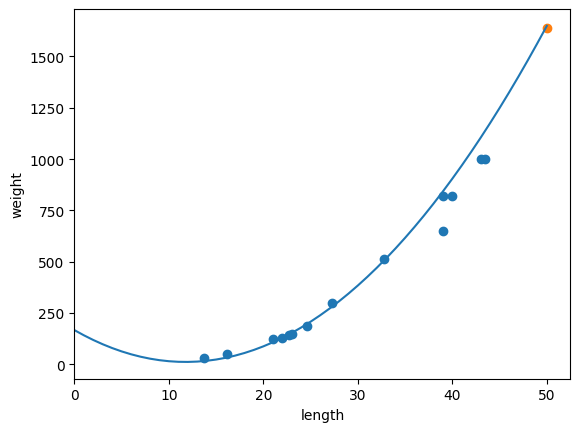

In [35]:
# 다항회귀 시각화
points = np.arange(51)

plt.scatter(x_train["Length2"], y_train)
plt.plot(points, -26.36 * points + 1.12 * points ** 2+ 166.97)
plt.scatter(50, 1641)
plt.xlim(0)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()